In [1]:
import os
import warnings
# suppress warning
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_dir = ['../dataset/mp_data/data_2020_04_07.csv']
target_dir = ['../regression/result/krr_2020_04_17/']
prefix = 'Na_test_krr_'

In [3]:
def show_diff(dir_name):
    raw_data = pd.read_csv(raw_dir[0])
    raw_data['volume_change'] = 100 / (1 + raw_data['max_delta_volume'].values)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'), index_col=0)
    pred_data['diff'] = pred_data['test_pred'] - pred_data['test_ground_truth']
    pred_data['diff_abs'] = abs(pred_data['diff'])
    pred_data = pred_data.sort_values(by=['diff_abs'], ascending=False)
    concat_data = pd.merge(pred_data, raw_data, left_on='raw_index', right_on='Unnamed: 0')
    return concat_data
   
show_cols = [
    'test_ground_truth', 'test_pred', 'raw_index', 'diff', 'diff_abs', 'formula_charge', 
    'formula_discharge', 'max_delta_volume', 'volume_change',
]
concat_data = show_diff(target_dir[0])
concat_data[show_cols][0:15]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,7.866583,4.057463,4087,-3.809120,3.809120,Fe5O8,NaFe5O8,0.073811,93.126301
1,-0.426742,3.268072,3803,3.694814,3.694814,Na2C,Na3C,0.225466,81.601606
2,2.160568,5.194274,4386,3.033707,3.033707,NaSbF6,Na3SbF6,0.125079,88.882664
3,0.149037,2.992875,4357,2.843838,2.843838,Na(FeO2)2,NaFeO2,0.100280,90.885959
4,0.559474,3.229717,4317,2.670242,2.670242,Na8(CuO2)5,Na2CuO2,0.043491,95.832178
5,2.863110,0.440514,3781,-2.422596,2.422596,Cs2SbBr6,Cs2NaSbBr6,0.078922,92.685076
6,0.750989,3.165368,3715,2.414379,2.414379,Na2BiAsCO7,Na3BiAsCO7,0.000879,99.912181
7,6.412462,4.130042,3696,-2.282420,2.282420,V(NF3)2,NaV(NF3)2,0.188306,84.153390
8,1.132465,3.384684,4316,2.252219,2.252219,Na3(CuO2)2,Na8(CuO2)5,0.014536,98.567235
9,1.076474,3.289629,3771,2.213155,2.213155,Na2SiSnCO7,Na3SiSnCO7,0.023223,97.730421


In [4]:
# see regression result

def yy_plot(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_Na_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
    xy_lim = [min_val - margin, max_val + margin]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'b.', markersize=15)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)))

  Unnamed: 0   R2_test  MAE_test
0       test  0.627049  0.595459


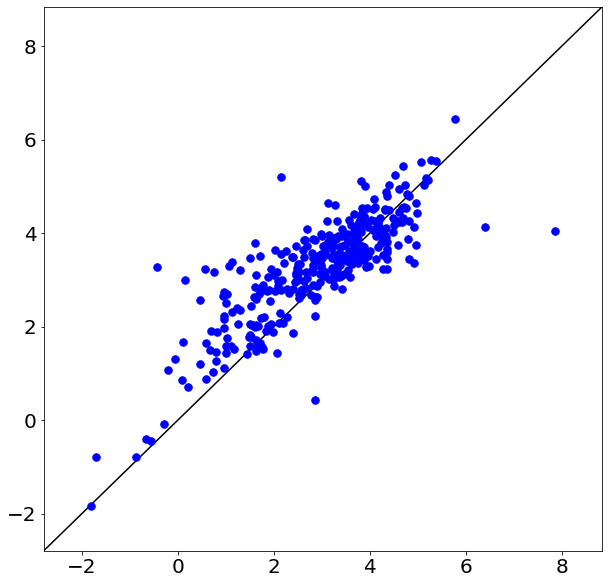

In [5]:
yy_plot(target_dir[0], prefix + 'yyplot')

In [6]:
# see regression result with Na3X

def yy_plot_with_Na3X(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_Na_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
    xy_lim = [min_val - margin, max_val + margin]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'b.', markersize=15)
    data = pred_data[pred_data['raw_index'].isin([3682, 3786, 3681, 3729])]
    ax.plot(data['test_ground_truth'], data['test_pred'], 'r.', markersize=15)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)))

  Unnamed: 0   R2_test  MAE_test
0       test  0.627049  0.595459


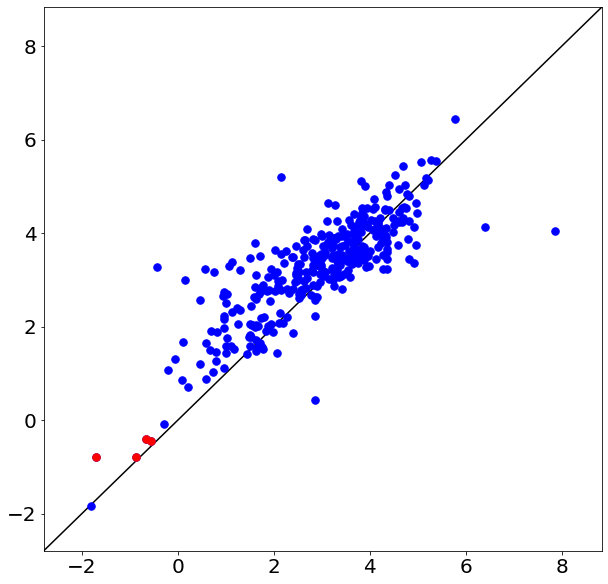

In [7]:
yy_plot_with_Na3X(target_dir[0], prefix + 'yyplot_with_Na3X')